In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [2]:
%cd D:\School\540\Data\Final

D:\School\540\Data\Final


### Cleaning/Formatting Website Data

In [3]:
# Read in HTML data.
url = 'https://www.nicerx.com/fast-food-capitals/'
req = requests.get(url)
soup = BeautifulSoup(req.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>The Fast Food Capitals of America | NiceRx</title>
<meta content="Despite warnings about its impact on our health, more than one-third of American adults eat fast food every single day. And hungry diners looking for a quick bite have plenty options to choose from, with an estimated 252,945 fast food restaurants across the country. But how does this vary from one state to the next?" name="description"/>
<link href="https://nicerx.com/fast-food-capitals/" rel="canonical"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="large_summary" name="twitter:card"/>
<meta content="https://nicerx.com/fast-food-capitals" name="twitter:url"/>
<meta content="The Fast Food Capitals of America | NiceRx" name="twitter:title"/>
<meta content="Despite warnings about its impact on our health, more than one-third of American adults eat fast food every single day. And hungry diners looking for a quick b

In [4]:
table = soup.findAll('table',{'class':'tableizer-table'})  # Find table.
table

[<table class="tableizer-table">
 <thead><tr class="tableizer-firstrow"><th>State</th><th>All fast food restaurants</th><th>Full-service restaurants </th><th>Subway</th><th>Starbucks</th><th>McDonalds</th><th>Dunkin Donut</th><th>Burger King</th><th>Taco Bell</th><th>Dominos</th><th>Wendys</th><th>Dairy Queen</th><th>KFC</th></tr></thead><tbody>
 <tr><td>Hawaii</td><td>97.5</td><td>89.9</td><td>7.0</td><td>6.4</td><td>5.2</td><td>0.8</td><td>2.0</td><td>2.1</td><td>1.6</td><td>0.7</td><td>0.5</td><td>1.1</td></tr>
 <tr><td>New York</td><td>92.3</td><td>106.1</td><td>4.5</td><td>3.3</td><td>3.1</td><td>7.6</td><td>1.8</td><td>1.0</td><td>1.2</td><td>1.1</td><td>0.2</td><td>0.8</td></tr>
 <tr><td>Maryland</td><td>89.7</td><td>59.0</td><td>6.8</td><td>4.6</td><td>4.7</td><td>4.7</td><td>2.0</td><td>1.5</td><td>2.0</td><td>1.6</td><td>0.5</td><td>1.1</td></tr>
 <tr><td>Nevada</td><td>84.8</td><td>68.4</td><td>6.1</td><td>8.2</td><td>4.6</td><td>0.9</td><td>2.1</td><td>2.6</td><td>1.8</td><

In [5]:
th = table[0].findAll('th')
headers = [i.getText() for i in th]
headers

['State',
 'All fast food restaurants',
 'Full-service restaurants ',
 'Subway',
 'Starbucks',
 'McDonalds',
 'Dunkin Donut',
 'Burger King',
 'Taco Bell',
 'Dominos',
 'Wendys',
 'Dairy Queen',
 'KFC']

In [6]:
rows = table[0].findAll('tr')  # Filter down to  'tr' tags in the table

df = pd.DataFrame(columns=headers)  # Initialize dataframe.
for i in rows:  # Iterate over rows.
    df_length = len(df)  # Get length of dataframe.
    td = i.findAll('td')  # Find all 'td' tags in the row.
    if len(td) == len(headers):  # 
        df.loc[df_length] = [j.getText() for j in td]  # Get list of 'td', set as a row in the dataframe at index of the length.

df

,State,All fast food restaurants,Full-service restaurants,Subway,Starbucks,McDonalds,Dunkin Donut,Burger King,Taco Bell,Dominos,Wendys,Dairy Queen,KFC
0,Hawaii,97.5,89.9,7.0,6.4,5.2,0.8,2.0,2.1,1.6,0.7,0.5,1.1
1,New York,92.3,106.1,4.5,3.3,3.1,7.6,1.8,1.0,1.2,1.1,0.2,0.8
2,Maryland,89.7,59.0,6.8,4.6,4.7,4.7,2.0,1.5,2.0,1.6,0.5,1.1
3,Nevada,84.8,68.4,6.1,8.2,4.6,0.9,2.1,2.6,1.8,1.4,1.2,1.3
4,Ohio,82.8,65.2,8.9,3.8,5.2,1.9,2.9,3.2,2.2,3.5,2.2,1.7
5,Illinois,82.5,77.7,7.8,4.8,5.2,5.5,2.4,2.1,1.6,1.6,2.0,1.2
6,Georgia,82.5,69.4,7.1,3.6,4.2,2.2,2.6,2.3,2.1,2.7,2.0,1.5
7,California,82.3,80.4,5.7,7.4,3.2,0.3,1.4,2.1,1.4,0.7,0.2,1.1
8,Alabama,81.7,57.6,8.2,1.8,5.0,0.9,3.5,2.8,2.5,2.0,1.3,1.8
9,Rhode Island,81.3,110.0,5.9,2.4,2.9,16.4,2.3,1.5,2.5,1.7,0.2,1.3


In [7]:
df.State.value_counts()  # Checkvalues of the state column.

Montana           1
North Carolina    1
Ohio              1
West Virginia     1
Colorado          1
Utah              1
Illinois          1
Maryland          1
Wisconsin         1
New Jersey        1
Washington        1
Texas             1
South Carolina    1
Arkansas          1
Louisiana         1
Iowa              1
Mississippi       1
New Hampshire     1
Oklahoma          1
New Mexico        1
Georgia           1
Kentucky          1
Virginia          1
Wyoming           1
Alabama           1
Oregon            1
Florida           1
Tennessee         1
North Dakota      1
Vermont           1
Minnesota         1
South Dakota      1
Nevada            1
Rhode Island      1
Idaho             1
Michigan          1
Alaska            1
Massachusetts     1
Connecticut       1
Kansas            1
Nebraska          1
California        1
Missouri          1
Maine             1
New York          1
Indiana           1
Delaware          1
Arizona           1
Pennsylvania      1
Hawaii            1


Fuzzy matching not needed on the state values.

In [8]:
duplicate = df[df.duplicated()]  # Check for duplicated rows.
duplicate

,State,All fast food restaurants,Full-service restaurants,Subway,Starbucks,McDonalds,Dunkin Donut,Burger King,Taco Bell,Dominos,Wendys,Dairy Queen,KFC


No duplicates.

In [9]:
# Replace headers
headers_new = ['State']  # Start with 'state' to exclude it from the header changes.
headers_new.extend([i + ' per 100k' for i in headers[1:]])  # Add 'per 100k' to the numerical columns to clarify representation.
df.columns = headers_new  # Replace dataframe headers with new values.
df

,State,All fast food restaurants per 100k,Full-service restaurants per 100k,Subway per 100k,Starbucks per 100k,McDonalds per 100k,Dunkin Donut per 100k,Burger King per 100k,Taco Bell per 100k,Dominos per 100k,Wendys per 100k,Dairy Queen per 100k,KFC per 100k
0,Hawaii,97.5,89.9,7.0,6.4,5.2,0.8,2.0,2.1,1.6,0.7,0.5,1.1
1,New York,92.3,106.1,4.5,3.3,3.1,7.6,1.8,1.0,1.2,1.1,0.2,0.8
2,Maryland,89.7,59.0,6.8,4.6,4.7,4.7,2.0,1.5,2.0,1.6,0.5,1.1
3,Nevada,84.8,68.4,6.1,8.2,4.6,0.9,2.1,2.6,1.8,1.4,1.2,1.3
4,Ohio,82.8,65.2,8.9,3.8,5.2,1.9,2.9,3.2,2.2,3.5,2.2,1.7
5,Illinois,82.5,77.7,7.8,4.8,5.2,5.5,2.4,2.1,1.6,1.6,2.0,1.2
6,Georgia,82.5,69.4,7.1,3.6,4.2,2.2,2.6,2.3,2.1,2.7,2.0,1.5
7,California,82.3,80.4,5.7,7.4,3.2,0.3,1.4,2.1,1.4,0.7,0.2,1.1
8,Alabama,81.7,57.6,8.2,1.8,5.0,0.9,3.5,2.8,2.5,2.0,1.3,1.8
9,Rhode Island,81.3,110.0,5.9,2.4,2.9,16.4,2.3,1.5,2.5,1.7,0.2,1.3


In [10]:
print(df.dtypes)  # Check column data types.
print(df.isna().sum())  # Check for missing values.
df_new = df.iloc[:,1:]  # Get every column except the first ('State').
df_new = df_new.apply(pd.to_numeric, axis=1)  # Convert statistical columns to numeric.

df_new['State'] = pd.Series(df['State'])  # Add 'State' column to new dataframe.

df_new = df_new[['State'] + [c for c in df if c != 'State']]  # Move 'State' back to the front of the dataframe.

State                                 object
All fast food restaurants per 100k    object
Full-service restaurants  per 100k    object
Subway per 100k                       object
Starbucks per 100k                    object
McDonalds per 100k                    object
Dunkin Donut per 100k                 object
Burger King per 100k                  object
Taco Bell per 100k                    object
Dominos per 100k                      object
Wendys per 100k                       object
Dairy Queen per 100k                  object
KFC per 100k                          object
dtype: object
State                                 0
All fast food restaurants per 100k    0
Full-service restaurants  per 100k    0
Subway per 100k                       0
Starbucks per 100k                    0
McDonalds per 100k                    0
Dunkin Donut per 100k                 0
Burger King per 100k                  0
Taco Bell per 100k                    0
Dominos per 100k                      0
W

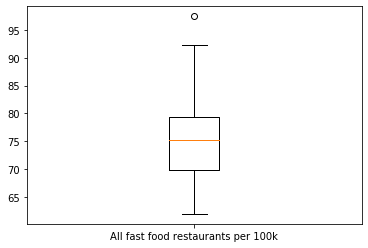

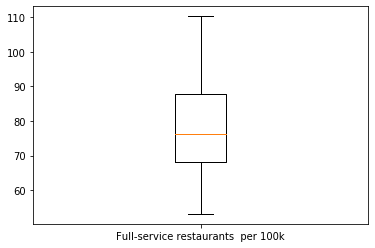

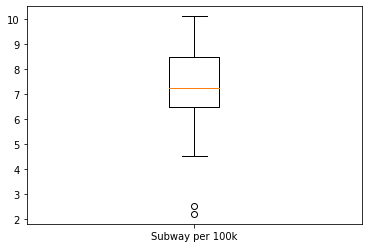

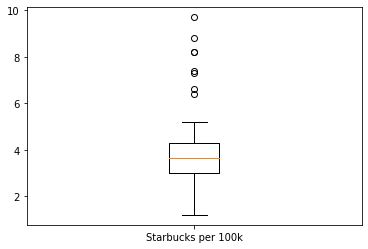

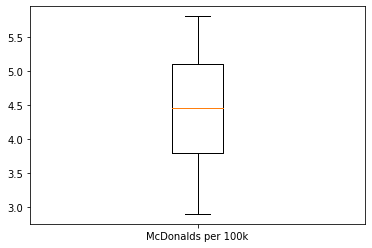

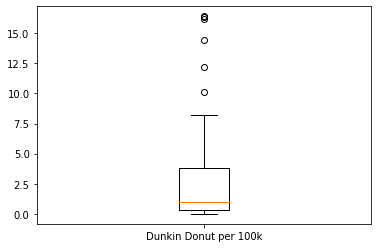

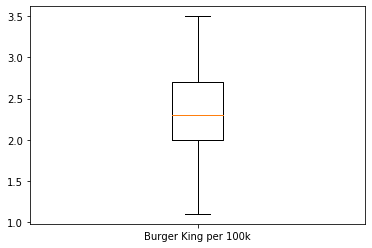

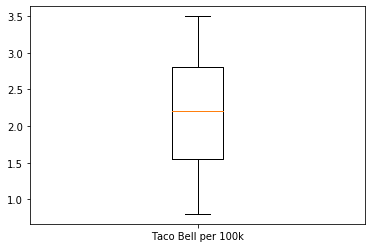

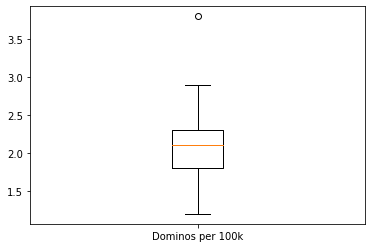

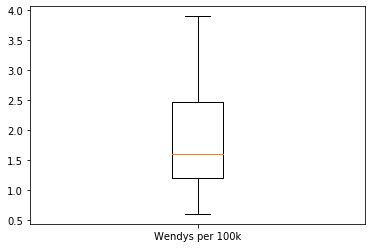

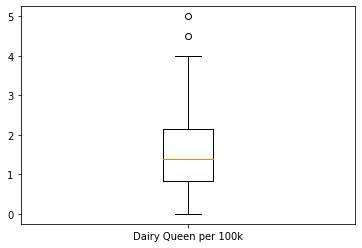

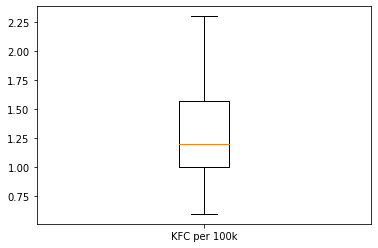

In [11]:
# View boxplots of numerical columns.
for i in list(range(1,len(df_new.columns))):
    plt.figure()
    plt.boxplot(df_new.iloc[:,i], labels = [df_new.columns[i]])

In [12]:
# Add two-letter state codes to the data.
two_letter_state = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

df_new['StateCode'] = df_new['State'].map(two_letter_state)  # Map dictionary values to state column.
df_new

,State,All fast food restaurants per 100k,Full-service restaurants per 100k,Subway per 100k,Starbucks per 100k,McDonalds per 100k,Dunkin Donut per 100k,Burger King per 100k,Taco Bell per 100k,Dominos per 100k,Wendys per 100k,Dairy Queen per 100k,KFC per 100k,StateCode
0,Hawaii,97.5,89.9,7.0,6.4,5.2,0.8,2.0,2.1,1.6,0.7,0.5,1.1,HI
1,New York,92.3,106.1,4.5,3.3,3.1,7.6,1.8,1.0,1.2,1.1,0.2,0.8,NY
2,Maryland,89.7,59.0,6.8,4.6,4.7,4.7,2.0,1.5,2.0,1.6,0.5,1.1,MD
3,Nevada,84.8,68.4,6.1,8.2,4.6,0.9,2.1,2.6,1.8,1.4,1.2,1.3,NV
4,Ohio,82.8,65.2,8.9,3.8,5.2,1.9,2.9,3.2,2.2,3.5,2.2,1.7,OH
5,Illinois,82.5,77.7,7.8,4.8,5.2,5.5,2.4,2.1,1.6,1.6,2.0,1.2,IL
6,Georgia,82.5,69.4,7.1,3.6,4.2,2.2,2.6,2.3,2.1,2.7,2.0,1.5,GA
7,California,82.3,80.4,5.7,7.4,3.2,0.3,1.4,2.1,1.4,0.7,0.2,1.1,CA
8,Alabama,81.7,57.6,8.2,1.8,5.0,0.9,3.5,2.8,2.5,2.0,1.3,1.8,AL
9,Rhode Island,81.3,110.0,5.9,2.4,2.9,16.4,2.3,1.5,2.5,1.7,0.2,1.3,RI


In [13]:
#df_new.to_csv('website_data.csv', index=False)  # Write website data to csv.

The data from the table on this website is very clean already. There is not much formatting to be done here. A few of the individual chains have high outliers, but this is due to chains not being nation-wide which skews the average down. 